# Medical MNIST

 - - -

## Dataset Instructions

1. ChestMNIST: 
> Chest X-ray dataset \
> Multi-Label(14) & Binary-Class(2) \
> 112,120 samples
2. BreastMNIST: 
> Breast UltraSound \
> Binary-Class(2) \
> 780 samples

- - -

In [1]:
import os
import time
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torchvision
import torch.nn as nn

In [70]:
from scipy.stats.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import bartlett
from scipy.stats import ks_2samp
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier

from torch.nn import functional as F
from torch.autograd import Variable
from torchvision import transforms, datasets, models
from torch.utils.data import Dataset, TensorDataset

In [3]:
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

PyTorch Version:  1.7.1
Torchvision Version:  0.8.2


In [4]:
class Args:
    # arugments
    epochs=50
    bs=16
    lr=0.001
    momentum=0.9
    num_classes=3
    verbose='store_true'
    seed=674

args = Args()    

np.random.seed(args.seed)
random.seed(args.seed)
torch.manual_seed(args.seed)

In [5]:
#Setting torch environment

if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
    
print('Using PyTorch version:', torch.__version__, ' Device: ', DEVICE)

Using PyTorch version: 1.7.1  Device:  cuda


- - -

# Data Handling

### Uploading dataset

In [30]:
## Loading Breastmnist dataset / Chestmnist datset
# data = np.load('./data/MMNIST/breastmnist.npz')
data = np.load('./data/MMNIST/chestmnist.npz')

In [72]:
# Data Transformation
data_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(0.5),
#     transforms.ColorJitter(brightness=(0.2, 2), 
#                                contrast=(0.3, 2), 
#                                saturation=(0.2, 2), 
#                                hue=(-0.3, 0.3)),
    transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456,0.406], [0.229, 0.224, 0.225])
])

In [73]:
# Uploading the food image data
lung_data = datasets.ImageFolder(root = 'E:/RESEARCH/Datasets/image/LUNG_public/COVID-19_Radiography_Dataset', transform = data_transforms)

In [65]:
train = data['train_images'].reshape(78468, 784)

In [68]:
train

array([[ 61,   9,  13, ..., 230, 215, 161],
       [  2,   2,   2, ...,   7,   2,   5],
       [155, 133, 134, ...,  27,  27,  27],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  6,   4,  11, ...,  72,  19,   0],
       [  3,   4,  13, ...,   6,   6,  12]], dtype=uint8)

In [31]:
for i in data:
    print(i)

train_images
val_images
test_images
train_labels
val_labels
test_labels


In [32]:
train_images = data['train_images']
val_images = data['val_images']
test_images = data['test_images']
train_labels = data['train_labels']
val_labels = data['val_labels']
test_labels = data['test_labels']

In [33]:
train_df = pd.DataFrame(train_labels)

In [40]:
train_df.shape

(78468, 14)

In [36]:
## Finding out which data row is matched for
class0 = train_df.loc[train_df[0] == 1]
class1 = train_df.loc[train_df[1] == 1]
class2 = train_df.loc[train_df[2] == 1]
class3 = train_df.loc[train_df[3] == 1]
class4 = train_df.loc[train_df[4] == 1]
class5 = train_df.loc[train_df[5] == 1]
class6 = train_df.loc[train_df[6] == 1]
class7 = train_df.loc[train_df[7] == 1]
class8 = train_df.loc[train_df[8] == 1]
class9 = train_df.loc[train_df[9] == 1]
class10 = train_df.loc[train_df[10] == 1]
class11 = train_df.loc[train_df[11] == 1]
class12 = train_df.loc[train_df[12] == 1]
class13 = train_df.loc[train_df[13] == 1]

In [37]:
class0_index = class0.index
class1_index = class1.index
class2_index = class2.index
class3_index = class3.index
class4_index = class4.index
class5_index = class5.index
class6_index = class6.index
class7_index = class7.index
class8_index = class8.index
class9_index = class9.index
class10_index = class10.index
class11_index = class11.index
class12_index = class12.index
class13_index = class13.index

In [61]:
print(class13_index)

Int64Index([  388,   911,  1639,  2235,  3409,  3518,  4514,  4636,  4998,
             6335,
            ...
            72962, 73435, 74635, 74807, 75761, 76714, 77207, 77473, 77741,
            78258],
           dtype='int64', length=144)


In [58]:
train_data = train_images

In [59]:
def SampleImages():
#     ran = random.sample(range(len(train_data)),3)
    plt.figure(figsize=(8,8))
    plt.subplot(3,5,1)
    plt.imshow(train_data[24], cmap='gray');plt.axis('off')
    plt.subplot(3,5,2)
    plt.imshow(train_data[13], cmap='gray');plt.axis('off')
    plt.subplot(3,5,3)
    plt.imshow(train_data[8], cmap='gray');plt.axis('off')
    plt.subplot(3,5,4)
    plt.imshow(train_data[5], cmap='gray');plt.axis('off')
    plt.subplot(3,5,5)
    plt.imshow(train_data[62], cmap='gray');plt.axis('off')
    plt.subplot(3,5,6)
    plt.imshow(train_data[11], cmap='gray');plt.axis('off')
    plt.subplot(3,5,7)
    plt.imshow(train_data[42], cmap='gray');plt.axis('off')
    plt.subplot(3,5,8)
    plt.imshow(train_data[6], cmap='gray');plt.axis('off')
    plt.subplot(3,5,9)
    plt.imshow(train_data[38], cmap='gray');plt.axis('off')
    plt.subplot(3,5,10)
    plt.imshow(train_data[108], cmap='gray');plt.axis('off')
    plt.subplot(3,5,11)
    plt.imshow(train_data[47], cmap='gray');plt.axis('off')
    plt.subplot(3,5,12)
    plt.imshow(train_data[243], cmap='gray');plt.axis('off')
    plt.subplot(3,5,13)
    plt.imshow(train_data[91], cmap='gray');plt.axis('off')
    plt.subplot(3,5,14)
    plt.imshow(train_data[388], cmap='gray');plt.axis('off')

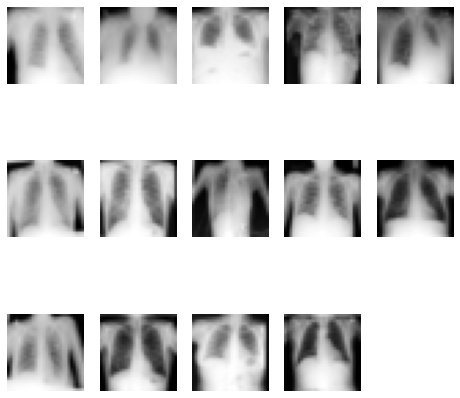

In [60]:
SampleImages()

- - -

## Data preprocessing

In [ ]:
## scaler setting for data standardization.
scaler = MinMaxScaler()

- - -

# Data Visualization

In [ ]:
hrv.describe()

In [ ]:
sns.set_style('whitegrid')
g = sns.FacetGrid(hrv, col='disorder')
g.map(plt.hist, 'gender', bins=20)

- - -

# Statistical Approaches

* Concept: How about generating additional dataset from current limited dataset, based on statistical theories?
> 1. Check the distribution of each data features(SDNN, ...) and visualize.
> 2. Calculate correlation coefficients between variables based on regression.
> 3. Calculate their mean, sd, and other statistics to find out its distribution.
>> However, most of them would be from normal distribution with different μ and σ based on the CLT.
> 4. Generate random dataset based on its distribution, correlation, and regression coefficients.

## HRV Variable Distributions

* dataset lists:
> baseline1 ~ stress  -- hrv_b1_s_sub \
> stress ~ baseline2  -- hrv_s_b2_sub \
> baseline2 ~ rest    -- hrv_b2_r_sub \
> rest ~ baseline3    -- hrv_r_b3_sub \
> baseline3 ~ recovery -- hrv_b3_c_sub \
> stress ~ rest  -- hrv_s_r_sub

In [ ]:
data_vis = hrv_s_r_sub

* Generating new dataframe that we want to check the distribution of.

In [ ]:
hrv_visual = pd.concat([data_vis, hrv_disorder],axis=1)

In [ ]:
## Separating dataframe into three different groups (CONTROL, MDD, PD)
hrv_CON = hrv_visual[hrv_visual["disorder"] == 2]
hrv_MDD = hrv_visual[hrv_visual["disorder"] == 0]
hrv_PD = hrv_visual[hrv_visual["disorder"] == 1]

* Total 13 variables: SDNN, NN50, PNN50, RMSSD, VLF, LF, HF, LF/HF, POWER, HR, RESP, SC, TEMP

In [ ]:
## Set the variable that we want to check
var = "SC"

In [ ]:
CON = hrv_CON[var]
MDD = hrv_MDD[var]
PD = hrv_PD[var]

* Comparing one variable for three groups

In [ ]:
plt.figure(figsize = (10,5))
sns.set_style("whitegrid")
plt.grid(True)
plt.xlabel('Variable: LF/HF ratio',fontsize=10)
plt.ylabel('Density',fontsize=10)

sns.kdeplot(CON)
sns.kdeplot(MDD)
sns.kdeplot(PD)

# plt.legend()
plt.legend(['Control', 'Major Depressive Disorder', 'Panic Disorder'], fontsize=10)

# plt.savefig('./data/figures/distributions/stress_rest/TEMP.png')

* Distribution check (based on statistics)

In [ ]:
## T-test for equal mean value check
## if p-value < 0.05, two distributions do not have equal mean values.
print(">T-TEST")
print("Mean value check for CON and MDD, p-value: {:.3f}".format(ttest_ind(CON, MDD).pvalue))
print("Mean value check for CON and PD, p-value: {:.3f}".format(ttest_ind(CON, PD).pvalue))
print("Mean value check for MDD and PD, p-value: {:.3f}".format(ttest_ind(MDD, PD).pvalue))
print("-----------------------------------------------")


## Bartlett-test for equal variability check
## if p-value < 0.05, two distributions do not have equal variance.
print(">Bartlett-test")
print("Equal Variability test for CON and MDD, p-value: {:.3f}".format(bartlett(CON, MDD).pvalue))
print("Equal Variability test for CON and PD, p-value: {:.3f}".format(bartlett(CON, PD).pvalue))
print("Equal Variability test for MDD and PD, p-value: {:.3f}".format(bartlett(MDD, PD).pvalue))
print("-----------------------------------------------")


## Shapiro-Wilk test for normal distribution check
## if p-value < 0.05, distribution is not following normal distribution.
print(">Shapiro-Wilks test")
print("Normal distribution test for CON, p-value: {:.3f}".format(shapiro(CON).pvalue))
print("Normal distribution test for MDD, p-value: {:.3f}".format(shapiro(MDD).pvalue))
print("Normal distribution test for PD, p-value: {:.3f}".format(shapiro(PD).pvalue))
print("-----------------------------------------------")


## Kolmogorov-Smirnov test for equal distribution check
## if p-value < 0.05, two distributions are not following same distribution. 
print(">Kolmogorov-Smirnov test")
print("Equal distributions test between CON and MDD, p-value: {:.3f}".format(ks_2samp(CON, MDD).pvalue))
print("Equal distributions test between CON and PD, p-value: {:.3f}".format(ks_2samp(CON, PD).pvalue))
print("Equal distributions test between MDD and PD, p-value: {:.3f}".format(ks_2samp(MDD, PD).pvalue))
print("-----------------------------------------------")

In [ ]:
SDNN = hrv_only['b1SDNN']
NN50 = hrv_only['b1NN50']
PNN50 = hrv_only['b1PNN50']
RMSSD = hrv_only['b1RMSSD']
VLF = hrv_only['b1VLF']
LF = hrv_only['b1LF']
HF = hrv_only['b1HF']
LFHF = hrv_only['b1LF/HF']
POWER = hrv_only['b1POWER']
RESP = hrv_only['b1RESP']
TEMP = hrv_only['b1TEMP']
HR = hrv_only['b1HR']

* All variables

In [ ]:
plt.figure(figsize = (10,5))
sns.set_style("whitegrid")
plt.grid(True)
plt.xlabel('Standardized Variables',fontsize=10)
plt.ylabel('Density',fontsize=10)

sns.kdeplot(b1SDNN)
sns.kdeplot(b1NN50)
sns.kdeplot(b1RMSSD)
# sns.kdeplot(b1VLF)
sns.kdeplot(b1LF)
# sns.kdeplot(b1HF)
sns.kdeplot(b1LFHF)
# sns.kdeplot(b1POWER)
# sns.kdeplot(b1PNN50)
sns.kdeplot(b1RESP)
sns.kdeplot(b1TEMP)
sns.kdeplot(b1HR)

# plt.legend()
plt.legend(['b1SDNN', 'b1NN50', 'b1RMSSD', 'b1LF', 'b1LF/HF', 'b1RESP', 'b1TEMP', 'b1HR'], fontsize=10)

- - -

## Central Limit Theorem approach

- - -

## Correlation between data features

* To generate new dataset from each feature distribution, we have to realize the correlation and regression coefficients.

In [ ]:
hrv_visual.columns

In [ ]:
hrv_visual.corr()

* Visualize the correlation

In [ ]:
plt.figure(figsize = (15,15))
corrMat = hrv_visual.corr()
sns.heatmap(corrMat, annot=True)
plt.show()

* Check whether each correlation coefficient is reliable

In [ ]:
## pearsonr function shows individual correlation coefficient with p-value
pearsonr(hrv_visual['SDNN'], hrv_visual['NN50'])

In [ ]:
## for loop to calculate correlation coefficient and following p-values for every variables.
col = list(hrv_visual)
corr_result = []
for i in range(0,len(col)-1):
    a = hrv_visual[hrv_visual.columns[i]]
    i += 1
    b = hrv_visual[hrv_visual.columns[i]]
    cor = pearsonr(a, b)
    corr_result.append(cor)

In [ ]:
corr_result_df = pd.DataFrame(corr_result, columns=['correlation', 'p-value'])

In [ ]:
var_names = []
for i in range(0,len(col)-1):
    cur_var = (col[i], col[i+1])
    var_names.append(cur_var)

In [ ]:
var_names_df = pd.DataFrame(var_names, columns=['Variable #1', 'Variable #2'])

In [ ]:
correlation_df = pd.concat([var_names_df, corr_result_df], axis=1)

In [ ]:
correlation_df['reliability'] = np.where(correlation_df['p-value']<0.05, "o", "x")

In [ ]:
correlation_df

In [ ]:
sd = np.std(hrv_visual['SDNN'])

In [ ]:
hrv_visual.mean()

In [ ]:
hrv_visual.std()

## Regression Coefficients

* To generate new dataset from each feature distribution, we have to realize the correlation and regression coefficients.

In [ ]:
hrv_visual.columns

In [ ]:
# features = hrv_visual[['SDNN', 'NN50', 'PNN50', 'RMSSD', 'VLF', 'LF', 'HF', 'LF/HF', 'POWER', 'HR', 'RESP', 'SC', 'TEMP']]
# features = hrv_visual[['SDNN', 'NN50', 'PNN50', 'RMSSD', 'LF/HF', 'HR']]
features = hrv_visual[['PNN50', 'LF/HF', 'HR']] ## variables that mentioned from previous research.(professor Jeon.)

disorder = hrv_visual[['disorder']]

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, disorder)

In [ ]:
model = LogisticRegression()
model.fit(train_features, train_labels)

In [ ]:
print(model.score(train_features, train_labels))

In [ ]:
print(model.coef_)

- - -

# Data Analysis

## Data Selection

In [ ]:
X = hrv_b1_s_sub
Y = hrv_disorder

In [ ]:
var_selection = ["SDNN", "NN50","PNN50", "RMSSD", "LF", "HF", "LF/HF", "HR"] ## Choose the variables that must be adopted for input values
X = X.loc[:,var_selection]

In [ ]:
## Generating dataset with y label on it. 
hrv_data = pd.concat([hrv_s_r_sub, hrv_disorder], axis=1)

In [ ]:
hrv_data.head()

## Train-Test Split

In [ ]:
X.columns

In [ ]:
## Split X and Y into training dataset and test dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
print("x_train dataset shape is", x_train.shape)
print("y_train dataset shape is", y_train.shape)

print("x_test dataset shape is", x_test.shape)
print("y_test dataset shape is", y_test.shape)

In [ ]:
## Converting dataframe format into numpy array
x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()
x_test_np = x_test.to_numpy()
y_test_np = y_test.to_numpy()

In [ ]:
## Use TensorDataset to create dataset with ndarray
train_dataset = TensorDataset(torch.tensor(x_train_np), torch.tensor(y_train_np))
test_dataset = TensorDataset(torch.tensor(x_test_np), torch.tensor(y_test_np))

In [ ]:
## Setting trainloader and testloader for training
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=args.bs, shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=args.bs, shuffle=False, num_workers=4)

- - -

## Regression

In [ ]:
logistic_reg = LogisticRegression(solver='lbfgs', max_iter = 4000)
logistic_reg.fit(x_train, y_train.values.ravel())

In [ ]:
predictions = logistic_reg.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,predictions))

- - -

## Decision Tree

In [ ]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

In [ ]:
dt_pred = dt_model.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,dt_pred))

In [ ]:
print(classification_report(y_test,dt_pred))

- - -

## Random Forest Classification

In [ ]:
rf= RandomForestClassifier(n_estimators=5000)
rf.fit(x_train, y_train.values.ravel())

In [ ]:
rf_pre=rf.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, rf_pre))

In [ ]:
print(classification_report(y_test, rf_pre))

- - -

## XGBoosts Classifier

In [ ]:
xgboost = XGBClassifier(n_estimators=1000, eval_metric='mlogloss')
xgboost.fit(x_train, y_train)

In [ ]:
xg_pred = xgboost.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, xg_pred))

In [ ]:
print(classification_report(y_test, xg_pred))

- - -

## Multi-Layer Perceptron

* Simple MLP

In [ ]:
input_size = x_train.shape[1]

In [ ]:
class MLP_HRV(nn.Module):
    def __init__(self):
        super(MLP_HRV, self).__init__()
        self.layer1 = nn.Linear(input_size, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, 3)

    def forward(self, x):
        x = x.view(-1, input_size)
        x = self.layer1(x)
        x = F.relu(x)
        x = self.layer2(x)
        x = F.relu(x)
        x = self.layer3(x)
        x = F.log_softmax(x, dim=1)
        return x

In [ ]:
model = MLP_HRV().to(DEVICE)
print(model)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
x_train = torch.tensor(x_train.values)

In [ ]:
for epoch in range(args.epochs):
    loss = 0
    batch = len(train_loader)

    for images, labels in train_loader: 
        images = images.view(-1, input_size).to(DEVICE) 
        labels = labels.to(DEVICE)
        
        optimizer.zero_grad()
        hypothesis = model(images)
        cost = criterion(hypothesis, labels)
        cost.backward()
        optimizer.step()
        loss += cost / batch

    print('Epoch:', '%03d' % (epoch + 1), 'Training loss =', '{:.5f}'.format(loss))

- - -

## Convolutional Neural Network

In [ ]:
print("X shape is ", X.shape)
print("Y shape is ", Y.shape)

In [ ]:
X.head()

- - -

## Autoencoder

* Here, we are going to use autoencoder algorithm to effectively extract the core features from dataset
* Autoencoder is useful for reducing high-dimensionality dataset

In [ ]:
task = hrv_s_b2_sub
# data_auto = pd.concat([task, hrv_disorder], axis=1)
data_auto = pd.concat([hrv_only, hrv_disorder], axis=1)

In [ ]:
data_auto.head()

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        ## encoder is similar to the simple neural network
        self.encoder = nn.Sequential(
            nn.Linear(), # gradually reducing dimensionality
            nn.ReLU(),
            nn.Linear(),
            nn.ReLU(),
            nn.Linear(),
        )
        ## decoder is recovering the dimensionality to origianl dataset size
        self.decoder = nn.Sequential(
            nn.Linear(), # gradually increasing dimensionality
            nn.ReLU(),
            nn.Linear(),
            nn.ReLU(),
            nn.Linear(),            
        )
        
    def forward(self, x):
        encoded = self.encoder(x)         ## creating latent varialbe 'encoder'
        decoded = self.decoder(encoded)   ## generating recovered image 'decoded'
        return encoded, decoded

In [ ]:
autoencoder = Autoencoder().to(DEVICE)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr = args.lr)  ## Adam for optimization function.
criterion = nn.MSELoss()  ## Using MSE(Mean Squared Error) to calculate the differences between original data and decoded data